<a href="https://colab.research.google.com/github/lakshmipoojitha2003/ML-Project/blob/main/Copy_of_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving indian_liver_patient.csv to indian_liver_patient (6).csv


In [ ]:
liver_data_train=pd.read_csv('indian_liver_patient.csv')
liver_data_train.head()

liver_data_train.shape

(583, 11)

In [ ]:
# import dataset
liver_data_train = pd.read_csv('/content/indian_liver_patient.csv')
liver_data_train.head()


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
def label_disease(liver_data_train):
    if liver_data_train["Dataset"] == 1:
        return 'yes'
    return 'no'

liver_data_train['HasDisease'] = liver_data_train.apply(lambda liver_data_train: label_disease(liver_data_train), axis=1)

In [ ]:
liver_data_train['HasDisease'].value_counts()

HasDisease
yes    416
no     167
Name: count, dtype: int64

In [ ]:
!conda install -c anaconda seaborn -y

/bin/bash: line 1: conda: command not found


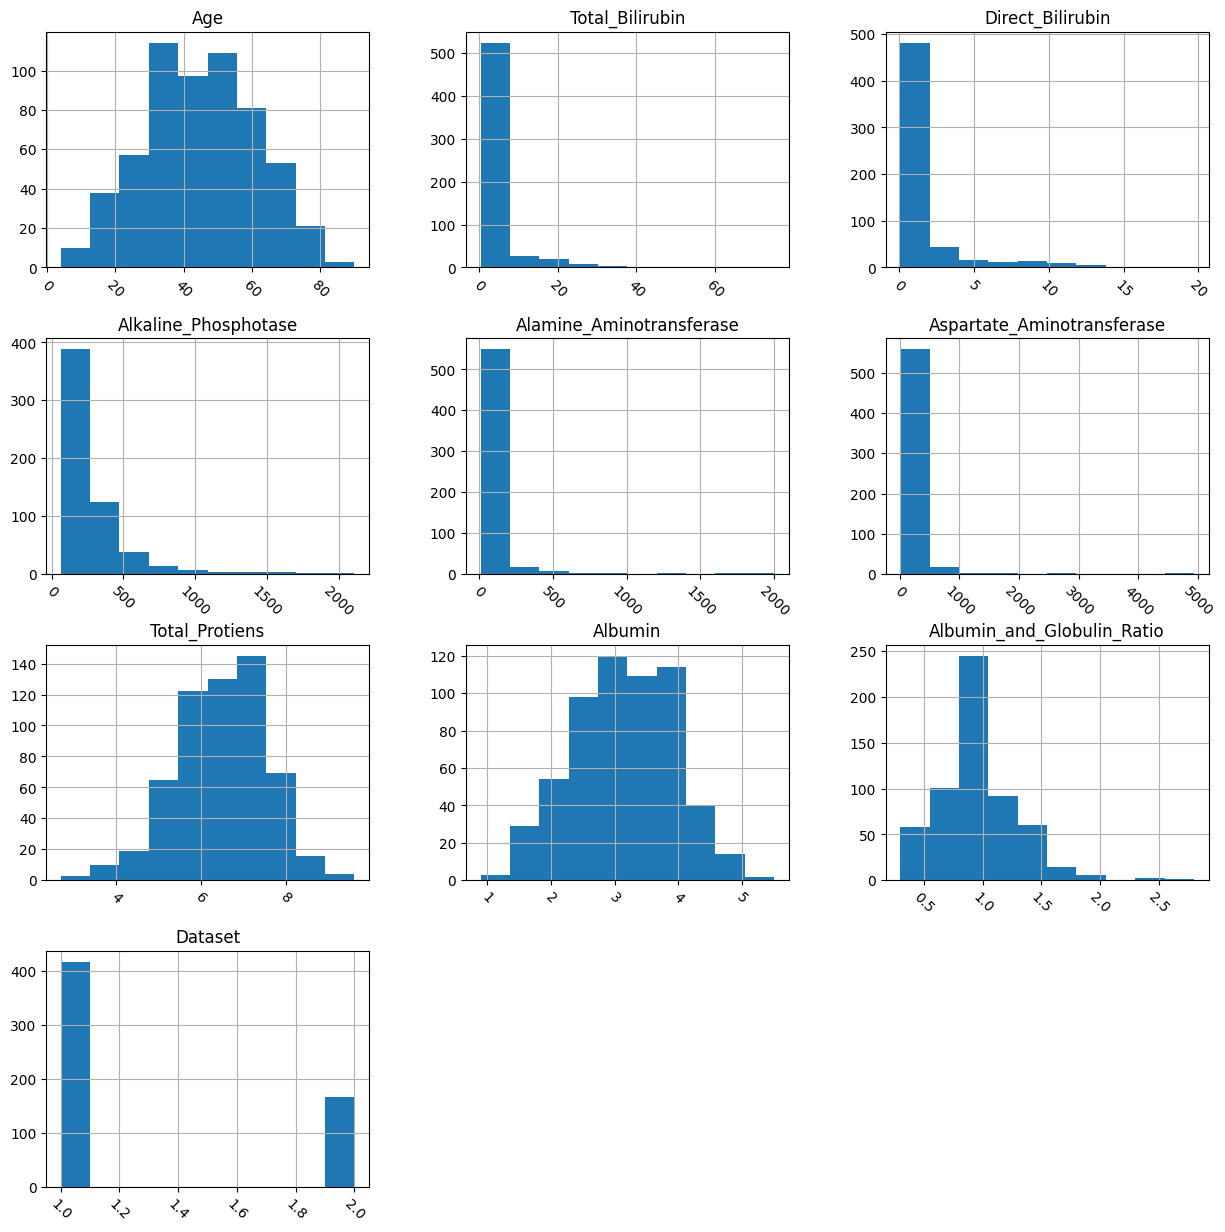

In [ ]:
liver_data_train.hist(figsize=(15,15), xrot=-45, bins=10) ## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()

<Axes: xlabel='count', ylabel='Gender'>

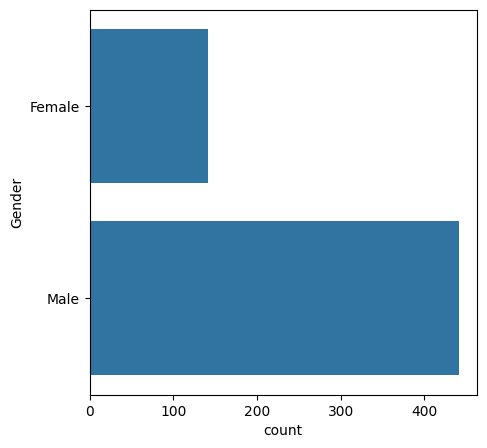

In [ ]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.countplot(y='Gender', data=liver_data_train)

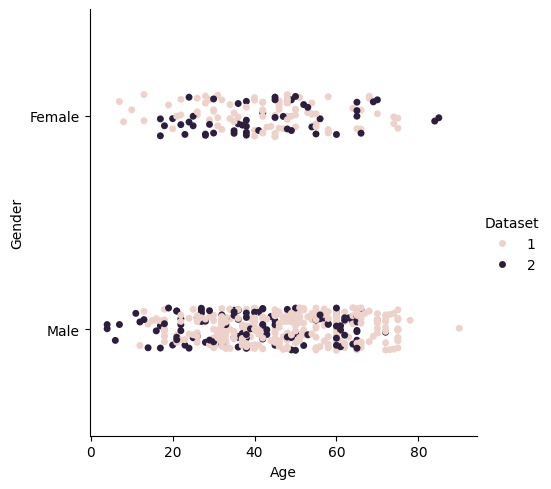

In [ ]:
import seaborn as sns
sns.catplot(x="Age", y="Gender", hue="Dataset", data=liver_data_train)

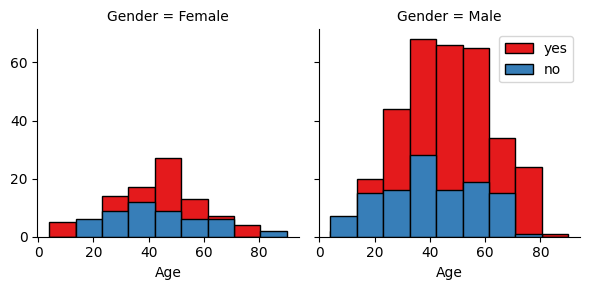

In [ ]:
import seaborn as sns
bins = np.linspace(liver_data_train.Age.min(), liver_data_train.Age.max(),10)
grids = sns.FacetGrid(liver_data_train, col="Gender", hue="HasDisease", palette="Set1", col_wrap=2)
grids.map(plt.hist, 'Age', bins=bins, ec="k")

grids.axes[-1].legend()
plt.show()

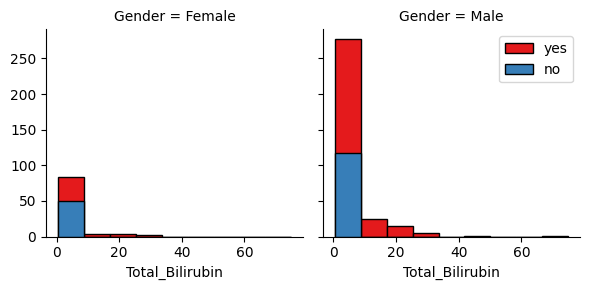

In [ ]:
bins = np.linspace(liver_data_train.Total_Bilirubin.min(), liver_data_train.Total_Bilirubin.max(),10)
grids = sns.FacetGrid(liver_data_train, col="Gender", hue="HasDisease", palette="Set1", col_wrap=2)
grids.map(plt.hist, 'Total_Bilirubin', bins=bins, ec="k")

grids.axes[-1].legend()
plt.show()

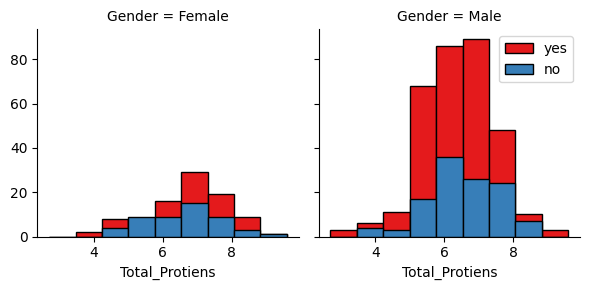

In [ ]:

bins = np.linspace(liver_data_train.Total_Protiens.min(), liver_data_train.Total_Protiens.max(),10)
grids = sns.FacetGrid(liver_data_train, col="Gender", hue="HasDisease", palette="Set1", col_wrap=2)
grids.map(plt.hist, 'Total_Protiens', bins=bins, ec="k")

grids.axes[-1].legend()
plt.show()

In [ ]:
liver_data_train['Gender'].replace(to_replace=['Male','Female'], value=[0,1],inplace=True)

In [ ]:
liver_data_train.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
HasDisease                    0
dtype: int64

<Axes: >

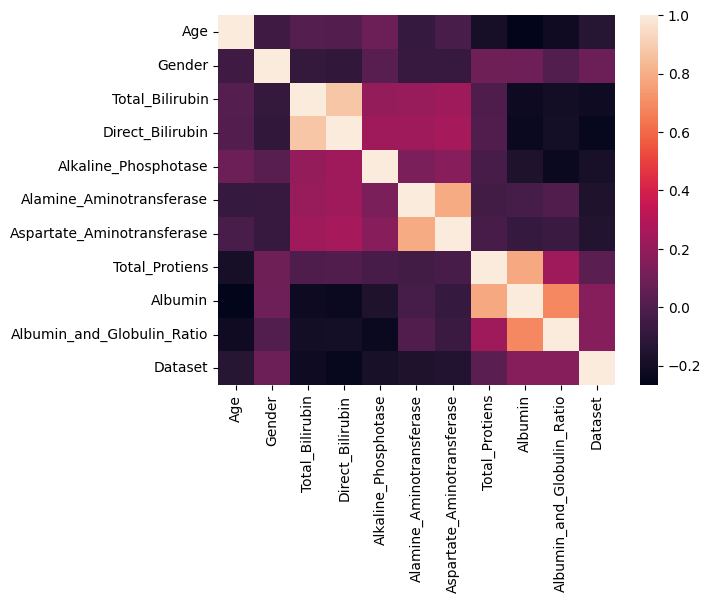

In [ ]:
liver_data_train['Albumin_and_Globulin_Ratio'].fillna((liver_data_train['Albumin_and_Globulin_Ratio'].mean()), inplace=True)
corr = liver_data_train .select_dtypes('number').corr()
sns.heatmap(corr)

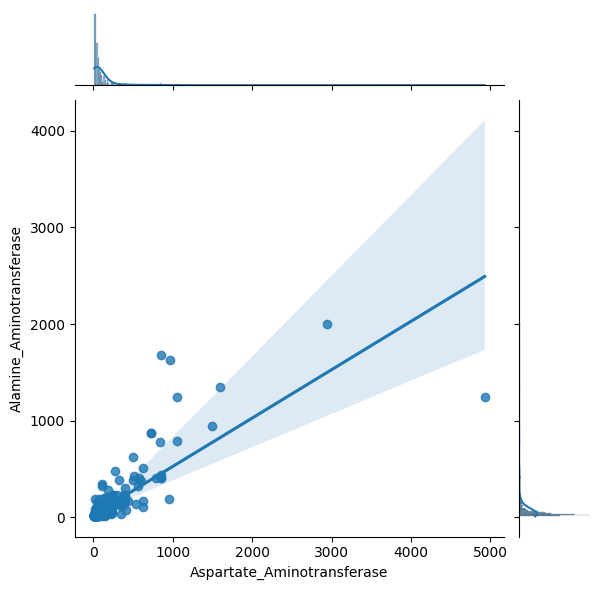

In [ ]:
sns.jointplot(x="Aspartate_Aminotransferase",y= "Alamine_Aminotransferase", data=liver_data_train, kind="reg")

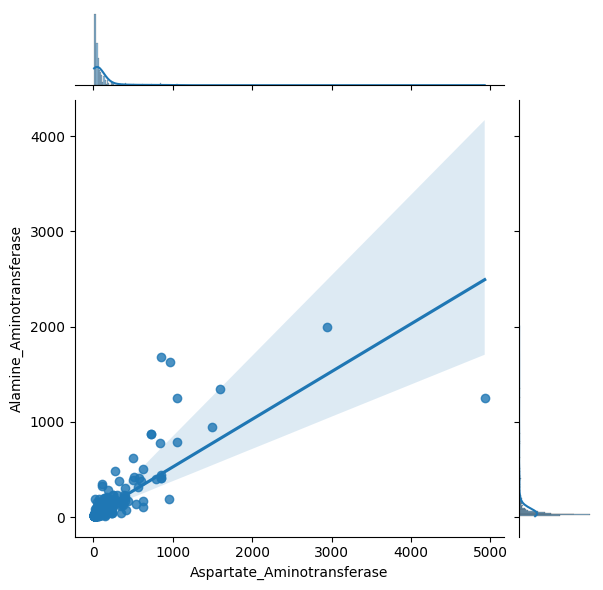

In [ ]:
sns.jointplot(data=liver_data_train,kind="reg", x="Aspartate_Aminotransferase", y="Alamine_Aminotransferase")

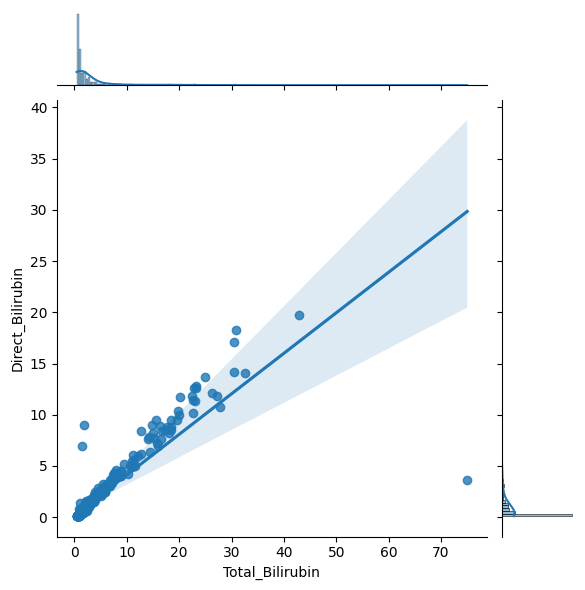

In [ ]:
sns.jointplot(x="Total_Bilirubin", y="Direct_Bilirubin", data=liver_data_train, kind="reg")

In [ ]:
Feature = liver_data_train[['Age','Gender','Total_Bilirubin','Direct_Bilirubin',
                      'Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase',
                      'Total_Protiens','Albumin','Albumin_and_Globulin_Ratio']]

In [ ]:
X = Feature
y = liver_data_train['HasDisease'].values
y[0:5]

array(['yes', 'yes', 'yes', 'yes', 'yes'], dtype=object)

Normalize Data


In [ ]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.25209764,  1.76228085, -0.41887783, -0.49396398, -0.42671496,
        -0.35466541, -0.31839333,  0.29211961,  0.19896867, -0.14789798],
       [ 1.06663704, -0.56744644,  1.22517135,  1.43042334,  1.68262856,
        -0.09159933, -0.03433257,  0.93756634,  0.07315659, -0.65069686],
       [ 1.06663704, -0.56744644,  0.6449187 ,  0.93150811,  0.82158795,
        -0.11352151, -0.14518555,  0.47653296,  0.19896867, -0.17932291],
       [ 0.81935624, -0.56744644, -0.37052344, -0.38705357, -0.44731402,
        -0.36562649, -0.31146502,  0.29211961,  0.32478075,  0.16635131],
       [ 1.68483904, -0.56744644,  0.0969023 ,  0.18313526, -0.39375647,
        -0.29437943, -0.17636295,  0.75315299, -0.93334003, -1.71914446]])

Classification

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=5)
liverDiseaseTree = DecisionTreeClassifier(criterion='entropy',max_depth=7)
liverDiseaseTree.fit(X_trainset,y_trainset)
liverDiseaseTree

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [ ]:
dt_yhat = liverDiseaseTree.predict(X_testset)

In [ ]:
from sklearn.metrics import f1_score
dt_f1 = f1_score(y_testset, dt_yhat, average='weighted')
print(dt_f1)

0.615756097608413


In [ ]:
from sklearn.metrics import jaccard_score
dt_ja = jaccard_score(y_testset, dt_yhat,pos_label="yes")
print(dt_ja)

0.6696428571428571


K_Nearest_Neighbors


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print('Train Set:',X_train.shape, y_train.shape)
print('Test Set:',X_test.shape, y_test.shape)

Train Set: (466, 10) (466,)
Test Set: (117, 10) (117,)


In [ ]:
Knn=10
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
mean_acc = np.zeros((Knn-1))
std_acc = np.zeros((Knn-1))
confusionMx = [];
for n in range(1,Knn):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    knn_hat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, knn_hat)
    std_acc[n-1]=np.std(knn_hat==y_test)/np.sqrt(knn_hat.shape[0])
mean_acc

array([0.65811966, 0.62393162, 0.62393162, 0.61538462, 0.65811966,
       0.64102564, 0.66666667, 0.62393162, 0.66666667])

In [ ]:
print( "The best accuracy was with", mean_acc.max(),"with k =",mean_acc.argmax()+1)

The best accuracy was with 0.6666666666666666 with k = 7


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k_nearest = KNeighborsClassifier(n_neighbors = 7).fit(X_train,y_train)
k_nearest

KNeighborsClassifier(n_neighbors=7)

In [ ]:
from sklearn.metrics import f1_score
knn_f1 = f1_score(y_test, knn_hat, average='weighted')

In [ ]:
from sklearn.metrics import jaccard_score
knn_ja = jaccard_score(y_test, knn_hat,pos_label="yes")
print(knn_ja)

0.6454545454545455


Logistic regression



In [ ]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(C=0.01, solver='liblinear').fit(X_trainset,y_trainset)
LogReg

LogisticRegression(C=0.01, solver='liblinear')

In [ ]:
LogReg_yhat = LogReg.predict(X_test)
LogReg_yhat[0:5]

array(['yes', 'yes', 'yes', 'yes', 'yes'], dtype=object)

In [ ]:
LogReg_yhat_prob = LogReg.predict_proba(X_test)
LogReg_yhat_prob[0:5]

array([[0.38550075, 0.61449925],
       [0.38140643, 0.61859357],
       [0.38581889, 0.61418111],
       [0.41372373, 0.58627627],
       [0.45929773, 0.54070227]])

In [ ]:
from sklearn.metrics import f1_score
LR_f1 = f1_score(y_test, LogReg_yhat, average='weighted')
print(LR_f1)

0.7033393670265179


In [ ]:
from sklearn.metrics import jaccard_score
LR_ja = jaccard_score(y_test, LogReg_yhat,pos_label="yes")
print(LR_ja)

0.7047619047619048


In [ ]:
from sklearn.metrics import log_loss
LR_log = log_loss(y_test, LogReg_yhat_prob)
print(LR_log)

0.5722557867737494


Support Vector Machine


In [ ]:
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

In [ ]:
Svm = svm.SVC(kernel='rbf')
Svm.fit(X_trainset,y_trainset)
svm_yhat = Svm.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score
svm_f1 = f1_score(y_test, svm_yhat, average='weighted')
print(svm_f1)

0.5934692088538241


In [ ]:
from sklearn.metrics import jaccard_score
svm_ja = jaccard_score(y_test, svm_yhat,pos_label="yes")
print(svm_ja)


0.6956521739130435


**`Accuracy Report `**
A report on accuracy of each model using different evaluation metrics.Accuracy is one metric for evaluating classification models. Informally, accuracy is the fraction of predictions our model got right. Formally, accuracy has the following definition:

Accuracy = Number of Correct Predictions / Total number of Predictions


In [ ]:
ja_list = [knn_ja, dt_ja, svm_ja, LR_ja]
f1_list = [knn_f1, dt_f1, svm_f1, LR_f1]
log_list = ['NA','NA','NA',LR_log]

accuracyReport = pd.DataFrame(ja_list, index=['KNN','Decision Tree','SVM','LogisticRegression'])
accuracyReport.columns = ['Accuracy']
#accuracyReport.insert(loc=1, column='F1-score',value=f1_list)
#accuracyReport.insert(loc=2, column='LogLoss',value=log_list)
accuracyReport.columns.name = 'Algorithm'
accuracyReport


Algorithm,Accuracy
KNN,0.645455
Decision Tree,0.669643
SVM,0.695652
LogisticRegression,0.704762


CART AND J48

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [ ]:
liver_data=pd.read_csv('indian_liver_patient.csv')

In [ ]:
label_encoder = LabelEncoder()
liver_data['Gender'] = label_encoder.fit_transform(liver_data['Gender'])

In [ ]:
liver_data.dropna(inplace=True)

# Convert categorical variables to numeric using label encoding
label_encoder = LabelEncoder()
liver_data['Gender'] = label_encoder.fit_transform(liver_data['Gender'])

# Separate features and target variable
X = liver_data.drop('Dataset', axis=1)
y = liver_data['Dataset']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train CART (Decision Tree) model
cart_model = DecisionTreeClassifier(random_state=42)
cart_model.fit(X_train, y_train)

# Train J48 (C4.5 decision tree) model
j48_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
j48_model.fit(X_train, y_train)

# Create ensemble model using VotingClassifier
ensemble_model = VotingClassifier(estimators=[('CART', cart_model), ('J48', j48_model)], voting='hard')
ensemble_model.fit(X_train, y_train)

# Make predictions
cart_predictions = cart_model.predict(X_test)
j48_predictions = j48_model.predict(X_test)
ensemble_predictions = ensemble_model.predict(X_test)

# Calculate accuracy
cart_accuracy = accuracy_score(y_test, cart_predictions)
j48_accuracy = accuracy_score(y_test, j48_predictions)
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)

print("CART (Decision Tree) Accuracy:", cart_accuracy)
print("J48 (C4.5 decision tree) Accuracy:", j48_accuracy)
print("Ensemble Model Accuracy:", ensemble_accuracy)

CART (Decision Tree) Accuracy: 0.5862068965517241
J48 (C4.5 decision tree) Accuracy: 0.603448275862069
Ensemble Model Accuracy: 0.6293103448275862


SVM AND CART

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving indian_liver_patient.csv to indian_liver_patient (7).csv


In [ ]:
data=pd.read_csv('indian_liver_patient.csv')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import VotingClassifier

'''# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00225/Indian%20Liver%20Patient%20Dataset%20(ILPD).csv"
data = pd.read_csv(url, header=None)'''

# Assign column names
data.columns = ['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
                'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
                'Albumin_and_Globulin_Ratio', 'Liver_Disease']

# Handle missing values
data.replace('?', np.nan, inplace=True)  # Replace '?' with NaN

# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Split features and target variable
X = data.drop('Liver_Disease', axis=1)
y = data['Liver_Disease']

# Custom Transformer to select specific columns
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.columns]

# Define pipeline for SVM
svm_pipeline = Pipeline([
    ('selector', ColumnSelector(columns=['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
                                         'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
                                         'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
                                         'Albumin_and_Globulin_Ratio'])),
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', SVC(kernel='rbf', C=1.0))
])

# Define pipeline for CART (Decision Tree)
cart_pipeline = Pipeline([
    ('selector', ColumnSelector(columns=['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
                                         'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
                                         'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
                                         'Albumin_and_Globulin_Ratio'])),
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', DecisionTreeClassifier())
])

# Create voting classifier combining pipelines
voting_clf = VotingClassifier(estimators=[
    ('svm', svm_pipeline),
    ('cart', cart_pipeline)
], voting='hard')

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the voting classifier on the training data
voting_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = voting_clf.predict(X_test)

# Evaluate the accuracy of the ensemble model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Ensemble Model:", accuracy)

Accuracy of Ensemble Model: 0.7435897435897436


LINEAR DISCRIMINANT ANALYSIS AND SVM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Load the dataset
'''url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00225/Indian%20Liver%20Patient%20Dataset%20(ILPD).csv"
data = pd.read_csv(url, header=None)'''

# Assign column names
data.columns = ['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
                'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
                'Albumin_and_Globulin_Ratio', 'Liver_Disease']

# Handle missing values
data.replace('?', np.nan, inplace=True)  # Replace '?' with NaN

# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Split features and target variable
X = data.drop('Liver_Disease', axis=1)
y = data['Liver_Disease']

# Impute missing values
X.fillna(X.mean(), inplace=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize individual classifiers
lda_classifier = LinearDiscriminantAnalysis()
svm_classifier = SVC(kernel='linear', probability=True, random_state=42)

# Create an ensemble model using VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('lda', lda_classifier),
    ('svm', svm_classifier)
], voting='soft')

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions on the test data using the ensemble model
ensemble_pred = ensemble_model.predict(X_test)

# Evaluate the accuracy of the ensemble model
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
print("Accuracy of Ensemble Model:", ensemble_accuracy)

Accuracy of Ensemble Model: 0.7435897435897436


MULTILAYER PERCEPTRON  AND SVM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Load the dataset
'''url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00225/Indian%20Liver%20Patient%20Dataset%20(ILPD).csv"
data = pd.read_csv(url, header=None)'''

# Assign column names
data.columns = ['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
                'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
                'Albumin_and_Globulin_Ratio', 'Liver_Disease']

# Handle missing values
data.replace('?', np.nan, inplace=True)  # Replace '?' with NaN

# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Split features and target variable
X = data.drop('Liver_Disease', axis=1)
y = data['Liver_Disease']

# Impute missing values
X.fillna(X.mean(), inplace=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize individual classifiers
mlp_classifier = MLPClassifier(max_iter=1000, random_state=42)
svm_classifier = SVC(kernel='linear', probability=True, random_state=42)

# Create an ensemble model using VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('mlp', mlp_classifier),
    ('svm', svm_classifier)
], voting='soft')

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions on the test data using the ensemble model
ensemble_pred = ensemble_model.predict(X_test)

# Evaluate the accuracy of the ensemble model
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
print("Accuracy of Ensemble Model:", ensemble_accuracy)

Accuracy of Ensemble Model: 0.7777777777777778


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


KNN AND LOGISTIC REGRESSION

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import VotingClassifier

In [ ]:
# Assign column names
data.columns = ['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
                'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
                'Albumin_and_Globulin_Ratio', 'Liver_Disease']

# Handle missing values
data.replace('?', np.nan, inplace=True)  # Replace '?' with NaN

# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Split features and target variable
X = data.drop('Liver_Disease', axis=1)
y = data['Liver_Disease']

# Custom Transformer to select specific columns
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.columns]

# Define pipeline for KNN
knn_pipeline = Pipeline([
    ('selector', ColumnSelector(columns=['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
                                         'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
                                         'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
                                         'Albumin_and_Globulin_Ratio'])),
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', KNeighborsClassifier())
])

# Define pipeline for Logistic Regression
logreg_pipeline = Pipeline([
    ('selector', ColumnSelector(columns=['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
                                         'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
                                         'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
                                         'Albumin_and_Globulin_Ratio'])),
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', LogisticRegression())
])

# Create voting classifier combining pipelines
voting_clf = VotingClassifier(estimators=[
    ('knn', knn_pipeline),
    ('logreg', logreg_pipeline)
], voting='hard')

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the voting classifier on the training data
voting_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = voting_clf.predict(X_test)

# Evaluate the accuracy of the ensemble model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Ensemble Model:", accuracy)

Accuracy of Ensemble Model: 0.7435897435897436


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MULTILAYER PERCEPTRON AND CART

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier

In [ ]:
data.replace('?', np.nan, inplace=True)  # Replace '?' with NaN

# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Split features and target variable
X = data.drop('Liver_Disease', axis=1)
y = data['Liver_Disease']

# Impute missing values
X.fillna(X.mean(), inplace=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize CART classifier
cart_classifier = DecisionTreeClassifier(random_state=42)

# Initialize MLP classifier
mlp_classifier = MLPClassifier(max_iter=1000, random_state=42)

# Create a Voting Classifier
voting_classifier = VotingClassifier(estimators=[
    ('cart', cart_classifier),
    ('mlp', mlp_classifier)
], voting='hard')

# Train the Voting Classifier
voting_classifier.fit(X_train, y_train)

# Make predictions on the test data
ensemble_pred = voting_classifier.predict(X_test)

# Evaluate the accuracy of the ensemble model
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
print("Accuracy of Ensemble Model (CART + MLP):", ensemble_accuracy)


Accuracy of Ensemble Model (CART + MLP): 0.7777777777777778


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


J48 AND XGB

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

In [ ]:
# Handle missing values
data.replace('?', np.nan, inplace=True)  # Replace '?' with NaN

# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Split features and target variable
X = data.drop('Liver_Disease', axis=1)
y = data['Liver_Disease']

# Custom Transformer to select specific columns
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.columns]

# Define pipeline for J48 Decision Tree
j48_pipeline = Pipeline([
    ('selector', ColumnSelector(columns=['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
                                         'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
                                         'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
                                         'Albumin_and_Globulin_Ratio'])),
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', DecisionTreeClassifier())
])

# Define pipeline for XGBoost
xgb_pipeline = Pipeline([
    ('selector', ColumnSelector(columns=['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
                                         'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
                                         'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
                                         'Albumin_and_Globulin_Ratio'])),
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', XGBClassifier())
])

# Create voting classifier combining pipelines
voting_clf = VotingClassifier(estimators=[
    ('j48', j48_pipeline),
    ('xgb', xgb_pipeline)
], voting='hard')

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the voting classifier on the training data
voting_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = voting_clf.predict(X_test)

# Evaluate the accuracy of the ensemble model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Ensemble Model:", accuracy)

Accuracy of Ensemble Model: 0.7692307692307693


SVM AND RANDOM FOREST

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC

In [ ]:
# Assign column names
data.columns = ['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
                'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
                'Albumin_and_Globulin_Ratio', 'Liver_Disease']

# Handle missing values
data.replace('?', np.nan, inplace=True)  # Replace '?' with NaN

# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Split features and target variable
X = data.drop('Liver_Disease', axis=1)
y = data['Liver_Disease']

# Impute missing values
X.fillna(X.mean(), inplace=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize individual classifiers
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
svm_classifier = SVC(kernel='linear', probability=True, random_state=42)

# Create an ensemble model using VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('rf', rf_classifier),
    ('svm', svm_classifier)
], voting='soft')

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions on the test data using the ensemble model
ensemble_pred = ensemble_model.predict(X_test)

# Evaluate the accuracy of the ensemble model
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
print("Accuracy of Ensemble Model:", ensemble_accuracy)


Accuracy of Ensemble Model: 0.7606837606837606


MLP , J48 , KNN

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import VotingClassifier

In [ ]:
# Assign column names
data.columns = ['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
                'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
                'Albumin_and_Globulin_Ratio', 'Liver_Disease']

# Handle missing values
data.replace('?', np.nan, inplace=True)  # Replace '?' with NaN

# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Split features and target variable
X = data.drop('Liver_Disease', axis=1)
y = data['Liver_Disease']

# Custom Transformer to select specific columns
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.columns]

# Define pipeline for MLP
mlp_pipeline = Pipeline([
    ('selector', ColumnSelector(columns=['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
                                         'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
                                         'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
                                         'Albumin_and_Globulin_Ratio'])),
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', MLPClassifier(max_iter=1000))
])

# Define pipeline for J48 Decision Tree
j48_pipeline = Pipeline([
    ('selector', ColumnSelector(columns=['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
                                         'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
                                         'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
                                         'Albumin_and_Globulin_Ratio'])),
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', DecisionTreeClassifier())
])

# Define pipeline for K-Nearest Neighbors (KNN)
knn_pipeline = Pipeline([
    ('selector', ColumnSelector(columns=['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
                                         'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
                                         'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
                                         'Albumin_and_Globulin_Ratio'])),
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', KNeighborsClassifier())
])

# Create voting classifier combining pipelines
voting_clf = VotingClassifier(estimators=[
    ('mlp', mlp_pipeline),
    ('j48', j48_pipeline),
    ('knn', knn_pipeline)
], voting='hard')

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the voting classifier on the training data
voting_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = voting_clf.predict(X_test)

# Evaluate the accuracy of the ensemble model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Ensemble Model:", accuracy)


Accuracy of Ensemble Model: 0.7692307692307693


MLP, DT, RF

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import VotingClassifier

In [ ]:
# Assign column names
data.columns = ['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
                'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
                'Albumin_and_Globulin_Ratio', 'Liver_Disease']

# Handle missing values
data.replace('?', np.nan, inplace=True)  # Replace '?' with NaN

# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Split features and target variable
X = data.drop('Liver_Disease', axis=1)
y = data['Liver_Disease']

# Custom Transformer to select specific columns
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.columns]

# Define pipeline for MLP
mlp_pipeline = Pipeline([
    ('selector', ColumnSelector(columns=['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
                                         'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
                                         'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
                                         'Albumin_and_Globulin_Ratio'])),
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', MLPClassifier(max_iter=1000))
])

# Define pipeline for Decision Tree
dt_pipeline = Pipeline([
    ('selector', ColumnSelector(columns=['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
                                         'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
                                         'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
                                         'Albumin_and_Globulin_Ratio'])),
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', DecisionTreeClassifier())
])

# Define pipeline for Random Forest
rf_pipeline = Pipeline([
    ('selector', ColumnSelector(columns=['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
                                         'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
                                         'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
                                         'Albumin_and_Globulin_Ratio'])),
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', RandomForestClassifier(n_estimators=100))
])

# Create voting classifier combining pipelines
voting_clf = VotingClassifier(estimators=[
    ('mlp', mlp_pipeline),
    ('dt', dt_pipeline),
    ('rf', rf_pipeline)
], voting='hard')

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the voting classifier on the training data
voting_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = voting_clf.predict(X_test)

# Evaluate the accuracy of the ensemble model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Ensemble Model:", accuracy)

Accuracy of Ensemble Model: 0.7435897435897436


CART,MLP,J48

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier

In [ ]:
# Assign column names
data.columns = ['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
                'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
                'Albumin_and_Globulin_Ratio', 'Liver_Disease']

# Handle missing values
data.replace('?', np.nan, inplace=True)  # Replace '?' with NaN

# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Split features and target variable
X = data.drop('Liver_Disease', axis=1)
y = data['Liver_Disease']

# Impute missing values
X.fillna(X.mean(), inplace=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize Decision Tree classifier (CART)
cart_classifier = DecisionTreeClassifier(random_state=42)

# Initialize J48 classifier (C4.5 decision tree)
j48_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Initialize MLP classifier
mlp_classifier = MLPClassifier(max_iter=1000, random_state=42)

# Create a Voting Classifier
voting_classifier = VotingClassifier(estimators=[
    ('cart', cart_classifier),
    ('j48', j48_classifier),
    ('mlp', mlp_classifier)
], voting='hard')

# Train the Voting Classifier
voting_classifier.fit(X_train, y_train)

# Make predictions on the test data
ensemble_pred = voting_classifier.predict(X_test)

# Evaluate the accuracy of the ensemble model
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
print("Accuracy of Ensemble Model (CART + J48 + MLP):", ensemble_accuracy)


Accuracy of Ensemble Model (CART + J48 + MLP): 0.7606837606837606


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


SVM,RF,DTKNN

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Assign column names
data.columns = ['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
                'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
                'Albumin_and_Globulin_Ratio', 'Liver_Disease']

# Handle missing values
data.replace('?', np.nan, inplace=True)  # Replace '?' with NaN

# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Split features and target variable
X = data.drop('Liver_Disease', axis=1)
y = data['Liver_Disease']

# Impute missing values
X.fillna(X.mean(), inplace=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize individual classifiers
svm_classifier = SVC(kernel='linear', probability=True, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
dtknn_classifier = KNeighborsClassifier()

# Create an ensemble model using VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('svm', svm_classifier),
    ('rf', rf_classifier),
    ('dtknn', dtknn_classifier)
], voting='soft')

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions on the test data using the ensemble model
ensemble_pred = ensemble_model.predict(X_test)

# Evaluate the accuracy of the ensemble model
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
print("Accuracy of Ensemble Model:", ensemble_accuracy)

Accuracy of Ensemble Model: 0.7606837606837606


SVM,GRADIENT BOOST

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC

In [ ]:
# Assign column names
data.columns = ['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
                'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
                'Albumin_and_Globulin_Ratio', 'Liver_Disease']

# Handle missing values
data.replace('?', np.nan, inplace=True)  # Replace '?' with NaN

# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Split features and target variable
X = data.drop('Liver_Disease', axis=1)
y = data['Liver_Disease']

# Impute missing values
X.fillna(X.mean(), inplace=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize individual classifiers
svm_classifier = SVC(kernel='linear', probability=True, random_state=42)
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Create an ensemble model using VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('svm', svm_classifier),
    ('gb', gb_classifier)
], voting='soft')

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions on the test data using the ensemble model
ensemble_pred = ensemble_model.predict(X_test)

# Evaluate the accuracy of the ensemble model
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
print("Accuracy of Ensemble Model:", ensemble_accuracy)


Accuracy of Ensemble Model: 0.7692307692307693


In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving indian_liver_patient.csv to indian_liver_patient (8).csv


In [ ]:
data=pd.read_csv('indian_liver_patient.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


MLP,SVM,RF

In [ ]:
data.fillna(method='ffill', inplace=True)

# Split the data into features and target variable
X = data.drop(columns=['Gender','Dataset'])
y = data['Dataset']


for i, col in enumerate(X.columns):
    if not pd.api.types.is_numeric_dtype(X[col]):
        print(f"Non-numeric feature: {col}")



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize individual models
mlp_model = MLPClassifier()  # MLP
chirp_model = None  # CHIRP - You will need to implement or obtain a library for this algorithm
rf_model = RandomForestClassifier()  # Random Forest

# Train individual models
mlp_model.fit(X_train, y_train)
# Train CHIRP model if available
rf_model.fit(X_train, y_train)

# Combine models using VotingClassifier
combined_model = VotingClassifier(estimators=[('mlp', mlp_model), ('rf', rf_model)], voting='hard')

# Train the combined model
combined_model.fit(X_train, y_train)

# Make predictions
y_pred = combined_model.predict(X_test)

# Evaluate the combined model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.717948717948718


SVM,RF,DT

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
data.dropna(inplace=True)

# Encode categorical variables
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

# Split the data into features and target
X = data.drop('Dataset', axis=1)
y = data['Dataset']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 2: Model Training
# SVM
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Step 3: Model Combination
# Make predictions
svm_pred = svm_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
dt_pred = dt_model.predict(X_test)

# Combine predictions using majority voting
combined_pred = np.round((svm_pred + rf_pred + dt_pred) / 3).astype(int)

# Step 4: Model Evaluation
combined_accuracy = accuracy_score(y_test, combined_pred)
combined_report = classification_report(y_test, combined_pred)

# Print evaluation results
print("Combined Model Accuracy:", combined_accuracy)
print("Combined Model Classification Report:")
print(combined_report)

Combined Model Accuracy: 0.7606837606837606
Combined Model Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.91      0.85        87
           2       0.56      0.33      0.42        30

    accuracy                           0.76       117
   macro avg       0.68      0.62      0.63       117
weighted avg       0.74      0.76      0.74       117



MLP,SVM,DT

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
data.dropna(inplace=True)

# Encode categorical variables
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

# Split the data into features and target
X = data.drop('Dataset', axis=1)
y = data['Dataset']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 2: Model Training
# MLP
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)

# SVM
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Step 3: Model Combination
# Make predictions
mlp_pred = mlp_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
dt_pred = dt_model.predict(X_test)

# Combine predictions using majority voting
combined_pred = np.round((mlp_pred + svm_pred + dt_pred) / 3).astype(int)

# Step 4: Model Evaluation
combined_accuracy = accuracy_score(y_test, combined_pred)
combined_report = classification_report(y_test, combined_pred)

# Print evaluation results
print("Combined Model Accuracy:", combined_accuracy)
print("Combined Model Classification Report:")
print(combined_report)

Combined Model Accuracy: 0.7777777777777778
Combined Model Classification Report:
              precision    recall  f1-score   support

           1       0.83      0.89      0.86        87
           2       0.58      0.47      0.52        30

    accuracy                           0.78       117
   macro avg       0.71      0.68      0.69       117
weighted avg       0.77      0.78      0.77       117



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP,CART,RF

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
data.dropna(inplace=True)

# Encode categorical variables
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

# Split the data into features and target
X = data.drop('Dataset', axis=1)
y = data['Dataset']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 2: Model Training
# MLP
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)

# CART (Classification and Regression Trees)
cart_model = DecisionTreeClassifier(random_state=42)
cart_model.fit(X_train, y_train)

# RF (Random Forest)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 3: Model Combination
# Make predictions
mlp_pred = mlp_model.predict(X_test)
cart_pred = cart_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Combine predictions using majority voting
combined_pred = np.round((mlp_pred + cart_pred + rf_pred) / 3).astype(int)

# Step 4: Model Evaluation
combined_accuracy = accuracy_score(y_test, combined_pred)
combined_report = classification_report(y_test, combined_pred)

# Print evaluation results
print("Combined Model Accuracy:", combined_accuracy)
print("Combined Model Classification Report:")
print(combined_report)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Combined Model Accuracy: 0.7606837606837606
Combined Model Classification Report:
              precision    recall  f1-score   support

           1       0.84      0.84      0.84        87
           2       0.53      0.53      0.53        30

    accuracy                           0.76       117
   macro avg       0.69      0.69      0.69       117
weighted avg       0.76      0.76      0.76       117



NB,CNN,SVM

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D

In [ ]:
data.dropna(inplace=True)

# Encode categorical variables
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

# Split the data into features and target
X = data.drop('Dataset', axis=1)
y = data['Dataset']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for CNN input (assuming 1D CNN)
X_cnn = np.expand_dims(X_scaled, axis=2)

# Split data into training and testing sets
X_train, X_test, X_train_cnn, X_test_cnn, y_train, y_test = train_test_split(X_scaled, X_cnn, y, test_size=0.2, random_state=42)

# Step 2: Model Training
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Convolutional Neural Network (CNN)
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(50, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))
cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, verbose=0)

# Support Vector Machine (SVM)
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Step 3: Model Combination
# Make predictions
nb_pred = nb_model.predict(X_test)
cnn_pred = (cnn_model.predict(X_test_cnn) > 0.5).astype(int)
svm_pred = svm_model.predict(X_test)

# Combine predictions using a soft voting ensemble method
combined_pred = np.round((nb_pred + cnn_pred.reshape(-1) + svm_pred) / 3).astype(int)

# Step 4: Model Evaluation
combined_accuracy = accuracy_score(y_test, combined_pred)
combined_report = classification_report(y_test, combined_pred)

# Print evaluation results
print("Combined Model Accuracy:", combined_accuracy)
print("Combined Model Classification Report:")
print(combined_report)

4/4 [==============================] - 0s 20ms/step
Combined Model Accuracy: 0.7435897435897436
Combined Model Classification Report:
              precision    recall  f1-score   support

           1       0.74      1.00      0.85        87
           2       0.00      0.00      0.00        30

    accuracy                           0.74       117
   macro avg       0.37      0.50      0.43       117
weighted avg       0.55      0.74      0.63       117



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


CNN,NB

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D

In [ ]:
data.dropna(inplace=True)

# Encode categorical variables
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

# Split the data into features and target
X = data.drop('Dataset', axis=1)
y = data['Dataset']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for CNN input (assuming 1D CNN)
X_cnn = np.expand_dims(X_scaled, axis=2)

# Split data into training and testing sets
X_train, X_test, X_train_cnn, X_test_cnn, y_train, y_test = train_test_split(X_scaled, X_cnn, y, test_size=0.2, random_state=42)

# Step 2: Model Training
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Convolutional Neural Network (CNN)
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(50, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))
cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, verbose=0)

# Step 3: Model Combination
# Make predictions
nb_pred = nb_model.predict(X_test)
cnn_pred = (cnn_model.predict(X_test_cnn) > 0.5).astype(int).reshape(-1)

# Combine predictions using a soft voting ensemble method
combined_pred = np.round((nb_pred + cnn_pred) / 2).astype(int)

# Step 4: Model Evaluation
combined_accuracy = accuracy_score(y_test, combined_pred)
combined_report = classification_report(y_test, combined_pred)

# Print evaluation results
print("Combined Model Accuracy:", combined_accuracy)
print("Combined Model Classification Report:")
print(combined_report)

4/4 [==============================] - 0s 3ms/step
Combined Model Accuracy: 0.5128205128205128
Combined Model Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.34      0.51        87
           2       0.34      1.00      0.51        30

    accuracy                           0.51       117
   macro avg       0.67      0.67      0.51       117
weighted avg       0.83      0.51      0.51       117



NB,RF,DT

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
data.dropna(inplace=True)

# Encode categorical variables
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

# Split the data into features and target
X = data.drop('Dataset', axis=1)
y = data['Dataset']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 2: Model Training
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 3: Model Combination
# Make predictions
nb_pred = nb_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Combine predictions using a majority voting approach
combined_pred = np.round((nb_pred + dt_pred + rf_pred) / 3).astype(int)

# Step 4: Model Evaluation
combined_accuracy = accuracy_score(y_test, combined_pred)
combined_report = classification_report(y_test, combined_pred)

# Print evaluation results
print("Combined Model Accuracy:", combined_accuracy)
print("Combined Model Classification Report:")
print(combined_report)

Combined Model Accuracy: 0.7094017094017094
Combined Model Classification Report:
              precision    recall  f1-score   support

           1       0.84      0.75      0.79        87
           2       0.45      0.60      0.51        30

    accuracy                           0.71       117
   macro avg       0.65      0.67      0.65       117
weighted avg       0.74      0.71      0.72       117



MLP,CART,SVM

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
data.dropna(inplace=True)

# Encode categorical variables
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

# Split the data into features and target
X = data.drop('Dataset', axis=1)
y = data['Dataset']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 2: Model Training
# Multilayer Perceptron (MLP)
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)


# print(mlp_pred.shape)
# print(X_cart.shape)

# X_cart = mlp_pred.reshape(-1, 1)  # Reshape MLP predictions to match the format expected by CART

# cart_pred = cart_model.predict(X_cart)

X_cart = X_test
# Classification and Regression Trees (CART)
cart_model = DecisionTreeClassifier(random_state=42, max_features=10)
cart_model.fit(X_train, y_train)

X_svm = X_test
X_svm = X_svm[:, :-2]
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
# Support Vector Machine (SVM)
# svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Step 3: Model Combination
# Make predictions using MLP
mlp_pred = mlp_model.predict(X_test)

# X_cart = mlp_pred.reshape(-1, 1)
# Use MLP predictions as input features for CART
X_cart = np.column_stack((X_test, mlp_pred))
cart_pred = cart_model.predict(X_test)


svm_model.n_features_in_ = X_svm.shape[1]

# X_svm = np.column_stack((X_cart, cart_pred))

svm_pred = svm_model.predict(X_svm)

# Use CART predictions as input features for SVM
X_svm = np.column_stack((X_cart, cart_pred))
# svm_pred = svm_model.predict(X_svm)

# Step 4: Model Evaluation
ensemble_accuracy = accuracy_score(y_test, svm_pred)
ensemble_report = classification_report(y_test, svm_pred)

# Print evaluation results
print("Ensemble Model Accuracy:", ensemble_accuracy)
print("Ensemble Model Classification Report:")
print(ensemble_report)

Ensemble Model Accuracy: 0.7435897435897436
Ensemble Model Classification Report:
              precision    recall  f1-score   support

           1       0.74      1.00      0.85        87
           2       0.00      0.00      0.00        30

    accuracy                           0.74       117
   macro avg       0.37      0.50      0.43       117
weighted avg       0.55      0.74      0.63       117



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and be

MLP,svm

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    int64  
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 50.2 KB


In [ ]:
data.dropna(inplace=True)

# Encode categorical variables
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

# Split the data into features and target
X = data.drop('Dataset', axis=1)
y = data['Dataset']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 2: Model Training
# Multilayer Perceptron (MLP)
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)

# Step 3: Obtain MLP predictions on test data
mlp_pred = mlp_model.predict(X_test)

# Step 4: Stack MLP predictions as additional features for SVM
X_svm = np.column_stack((X_test, mlp_pred))

# Step 5: Model Training (SVM)
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_svm, y_test)  # Use y_test as SVM doesn't need training

# Step 6: Obtain final predictions
svm_pred = svm_model.predict(X_svm)

# Step 7: Model Evaluation
ensemble_accuracy = accuracy_score(y_test, svm_pred)
ensemble_report = classification_report(y_test, svm_pred)

# Print evaluation results
print("Ensemble Model Accuracy:", ensemble_accuracy)
print("Ensemble Model Classification Report:")
print(ensemble_report)

Ensemble Model Accuracy: 0.8034188034188035
Ensemble Model Classification Report:
              precision    recall  f1-score   support

           1       0.79      1.00      0.88        87
           2       1.00      0.23      0.38        30

    accuracy                           0.80       117
   macro avg       0.90      0.62      0.63       117
weighted avg       0.84      0.80      0.75       117



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


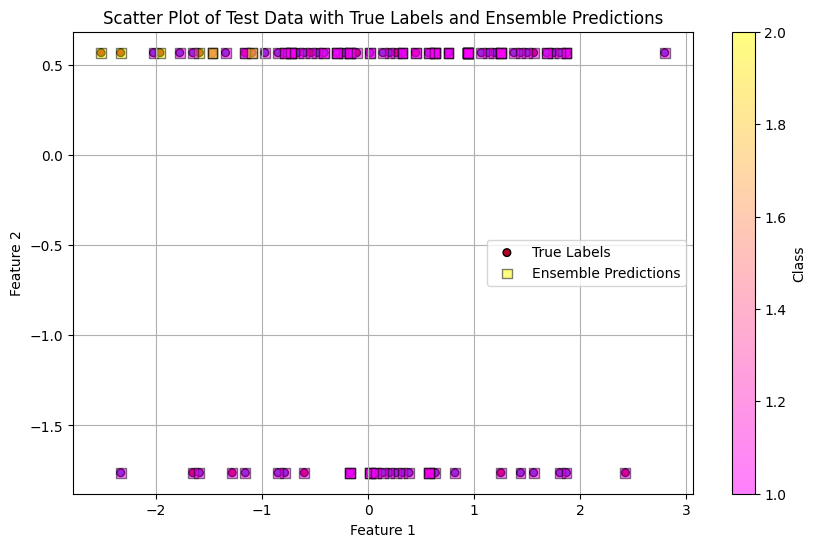

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have the necessary imports and data preprocessing steps already performed
c = np.concatenate((y_test, np.zeros(4)))

# Scatter plot for original features
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=c[:117], cmap=plt.cm.coolwarm, s=30, edgecolors='k', label='True Labels')

# Scatter plot for ensemble predictions
plt.scatter(X_test[:, 0], X_test[:, 1], c=svm_pred[:117], cmap=plt.cm.spring, s=50, marker='s', edgecolors='k', alpha=0.5, label='Ensemble Predictions')

plt.title('Scatter Plot of Test Data with True Labels and Ensemble Predictions')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.colorbar(label='Class')
plt.grid(True)
plt.show()


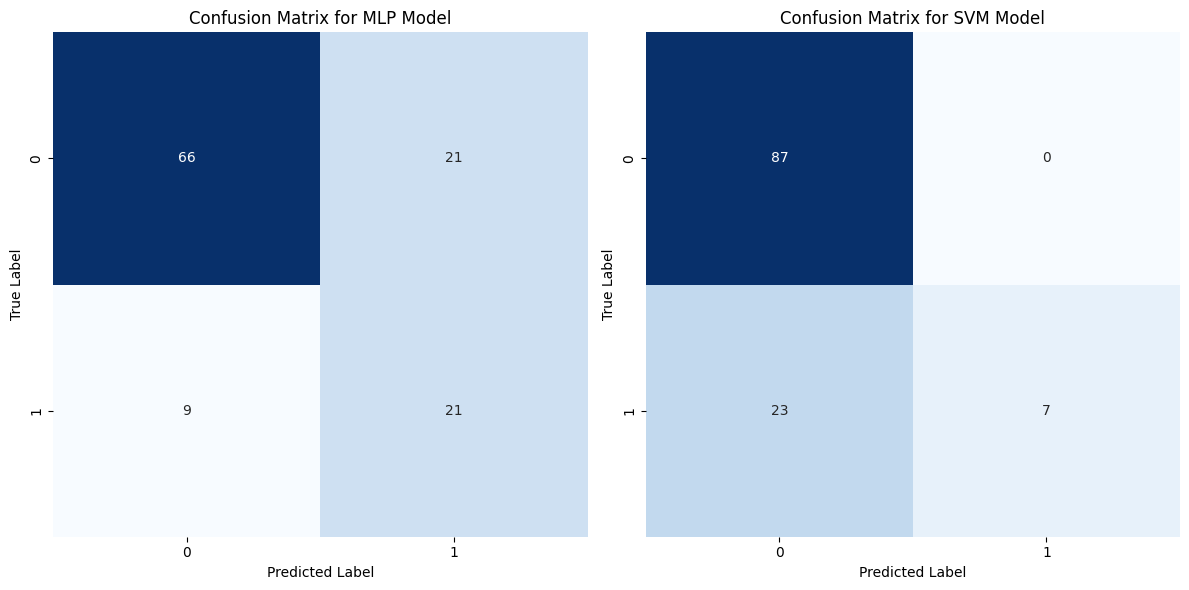

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Assuming you have already defined and trained the MLP and SVM models (mlp_model and svm_model) and obtained predictions (mlp_pred and svm_pred)

# Compute confusion matrix for MLP model
cm_mlp = confusion_matrix(y_test, mlp_pred)

# Compute confusion matrix for SVM model
cm_svm = confusion_matrix(y_test, svm_pred)

# Plot combined confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot confusion matrix for MLP model
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('Confusion Matrix for MLP Model')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Plot confusion matrix for SVM model
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_title('Confusion Matrix for SVM Model')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


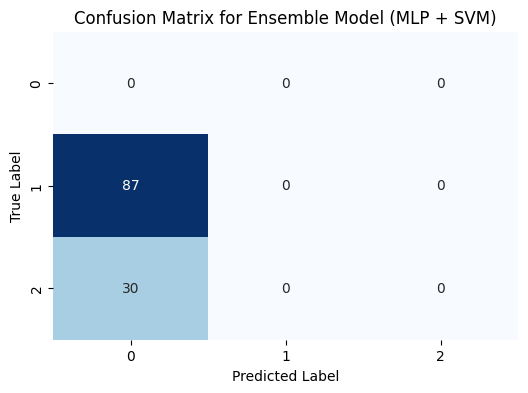

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Assuming you have already defined and trained the MLP and SVM models (mlp_model and svm_model) and obtained predictions (mlp_pred and svm_pred)

# Stack predictions from MLP and SVM models
ensemble_pred = np.column_stack((mlp_pred, svm_pred))

# Combine predictions using a simple voting mechanism (e.g., by taking the majority vote)
# Here, we assume the ensemble prediction is the one with the highest sum of votes for each instance
ensemble_pred_combined = np.argmax(ensemble_pred, axis=1)

# Compute confusion matrix for ensemble model
cm_ensemble = confusion_matrix(y_test, ensemble_pred_combined)

# Plot confusion matrix for ensemble model
plt.figure(figsize=(6, 4))
sns.heatmap(cm_ensemble, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Ensemble Model (MLP + SVM)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


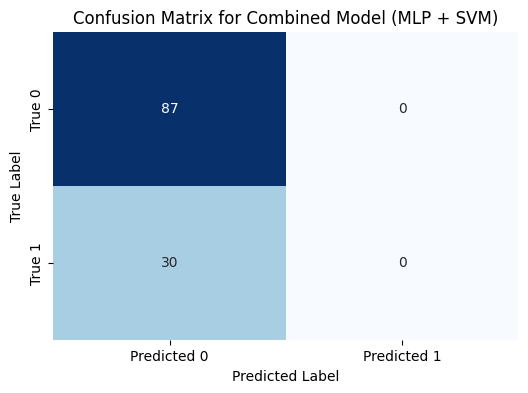

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have already defined and trained the MLP and SVM models (mlp_model and svm_model) and obtained predictions (mlp_pred and svm_pred)

# Combine predictions from MLP and SVM models
combined_pred = (mlp_pred + svm_pred) >= 1  # Simple voting mechanism

# Generate confusion matrix for the combined model
cm_combined = confusion_matrix(y_test, combined_pred)

# Plot confusion matrix for the combined model
plt.figure(figsize=(6, 4))
sns.heatmap(cm_combined, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Combined Model (MLP + SVM)')
plt.xticks([0.5, 1.5], ['Predicted 0', 'Predicted 1'])
plt.yticks([0.5, 1.5], ['True 0', 'True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



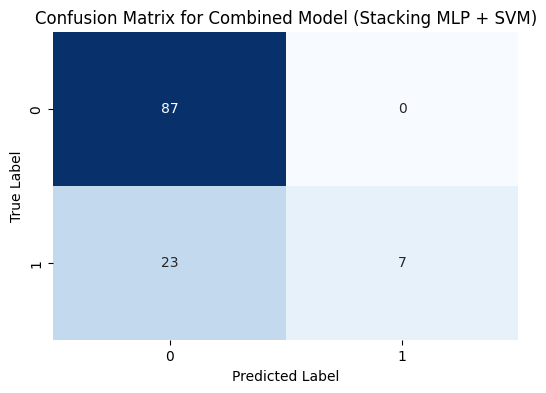

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Assuming you have already defined and trained the MLP and SVM models (mlp_model and svm_model) and obtained predictions (mlp_pred and svm_pred)

# Stack predictions from MLP and SVM models
ensemble_pred = np.column_stack((mlp_pred, svm_pred))

# Define a meta-learner (e.g., MLPClassifier) to learn from the predictions of the base models
meta_learner = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Combine base models and meta-learner in a stacking classifier
stacking_model = StackingClassifier(estimators=[('mlp', mlp_model), ('svm', svm_model)], final_estimator=meta_learner)

# Fit the stacking model on the combined predictions
stacking_model.fit(ensemble_pred, y_test)

# Obtain predictions from the stacking model
stacking_pred = stacking_model.predict(ensemble_pred)

# Generate confusion matrix for the combined model
cm_stacking = confusion_matrix(y_test, stacking_pred)

# Plot confusion matrix for the combined model
plt.figure(figsize=(6, 4))
sns.heatmap(cm_stacking, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Combined Model (Stacking MLP + SVM)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Step 2: Model Training with Grid Search for MLP
mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (200,)],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

mlp_grid_search = GridSearchCV(MLPClassifier(max_iter=1000, random_state=42), param_grid=mlp_param_grid, cv=5)
mlp_grid_search.fit(X_train, y_train)
mlp_best_model = mlp_grid_search.best_estimator_

# Step 3: Obtain best MLP predictions on test data
mlp_pred = mlp_best_model.predict(X_test)

# Step 4: Stack MLP predictions as additional features for SVM
X_svm = np.column_stack((X_test, mlp_pred))

# Step 5: Model Training with Grid Search for SVM
svm_param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
}

svm_grid_search = GridSearchCV(SVC(kernel='rbf', random_state=42), param_grid=svm_param_grid, cv=5)
svm_grid_search.fit(X_svm, y_test)  # Use y_test as SVM doesn't need training
svm_best_model = svm_grid_search.best_estimator_

# Step 6: Obtain final predictions
svm_pred = svm_best_model.predict(X_svm)

# Step 7: Model Evaluation
ensemble_accuracy = accuracy_score(y_test, svm_pred)
ensemble_report = classification_report(y_test, svm_pred)

# Print evaluation results
print("Ensemble Model Accuracy:", ensemble_accuracy)
print("Ensemble Model Classification Report:")
print(ensemble_report)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Ensemble Model Accuracy: 0.811965811965812
Ensemble Model Classification Report:
              precision    recall  f1-score   support

           1       0.80      1.00      0.89        87
           2       1.00      0.27      0.42        30

    accuracy                           0.81       117
   macro avg       0.90      0.63      0.65       117
weighted avg       0.85      0.81      0.77       117



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import GridSearchCV
# Suppress convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Step 2: Model Training with Grid Search for MLP
mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (200,)],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

mlp_grid_search = GridSearchCV(MLPClassifier(max_iter=1000, random_state=42), param_grid=mlp_param_grid, cv=5)
mlp_grid_search.fit(X_train, y_train)
mlp_best_model = mlp_grid_search.best_estimator_

# Step 3: Obtain best MLP predictions on test data
mlp_pred = mlp_best_model.predict(X_test)

# Step 4: Stack MLP predictions as additional features for SVM
X_svm = np.column_stack((X_test, mlp_pred))

# Step 5: Model Training with Grid Search for SVM
svm_param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
}

svm_grid_search = GridSearchCV(SVC(kernel='rbf', random_state=42), param_grid=svm_param_grid, cv=5)
svm_grid_search.fit(X_svm, y_test)  # Use y_test as SVM doesn't need training
svm_best_model = svm_grid_search.best_estimator_

# Step 6: Obtain final predictions
svm_pred = svm_best_model.predict(X_svm)

# Step 7: Model Evaluation
ensemble_accuracy = accuracy_score(y_test, svm_pred)
ensemble_report = classification_report(y_test, svm_pred)

# Print evaluation results
print("Ensemble Model Accuracy:", ensemble_accuracy)
print("Ensemble Model Classification Report:")
print(ensemble_report)


NameError: name 'MLPClassifier' is not defined

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming you have your data loaded into X (features) and y (target variable)

# Drop rows with missing values
data.dropna(inplace=True)

# Encode categorical variables if any
# For example:
# le = LabelEncoder()
# data['Gender'] = le.fit_transform(data['Gender'])

# Split the data into features and target
X = data.drop('Dataset', axis=1)
y = data['Dataset']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# CatBoost Classifier
catboost = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, random_state=42, verbose=False)
catboost.fit(X_train, y_train)
catboost_pred = catboost.predict(X_test)

# Logistic Regression using the output of CatBoost as input
lr = LogisticRegression(random_state=42)
lr.fit(np.column_stack((X_test, catboost_pred)), y_test)
lr_pred = lr.predict(np.column_stack((X_test, catboost_pred)))

# Ensemble Model Evaluation
ensemble_accuracy1 = accuracy_score(y_test, lr_pred)

# Print ensemble model accuracy
print("Ensemble Model Accuracy:", ensemble_accuracy1)


Ensemble Model Accuracy: 0.7948717948717948


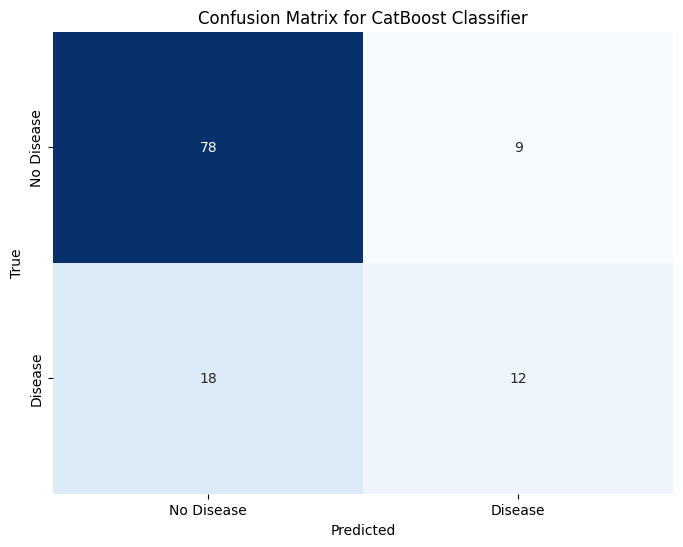

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obtain predictions from CatBoost model
catboost_pred = catboost.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, catboost_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for CatBoost Classifier')
plt.show()


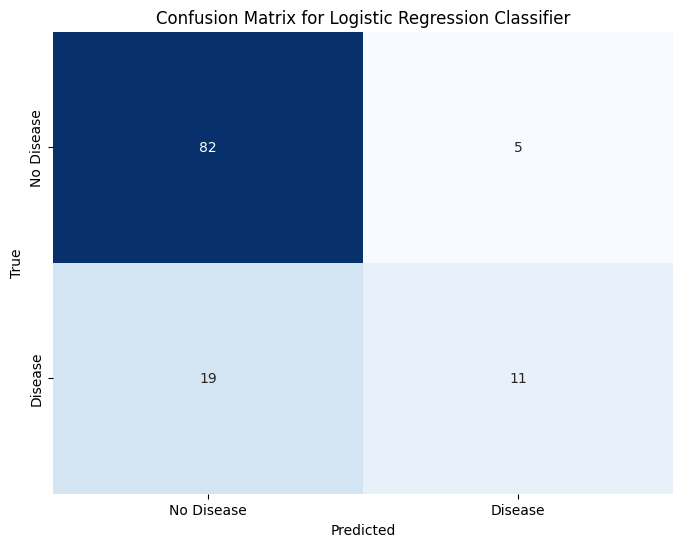

In [ ]:
# Obtain predictions from Logistic Regression model
lr_pred = lr.predict(np.column_stack((X_test, catboost_pred)))

# Create confusion matrix
cm_lr = confusion_matrix(y_test, lr_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Assuming you have your data loaded into X (features) and y (target variable)

# Drop rows with missing values
data.dropna(inplace=True)

# Encode categorical variables if any
# For example:
# le = LabelEncoder()
# data['Gender'] = le.fit_transform(data['Gender'])

# Split the data into features and target
X = data.drop('Dataset', axis=1)
y = data['Dataset']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# CatBoost Classifier
catboost = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, random_state=42, verbose=False)
catboost.fit(X_train, y_train)
catboost_pred = catboost.predict(X_test)

# Ensemble Model Evaluation
ensemble_accuracy = accuracy_score(y_test, catboost_pred)

# Print ensemble model accuracy
print("Ensemble Model Accuracy:", ensemble_accuracy)


Ensemble Model Accuracy: 0.7692307692307693


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming you have your data loaded into X (features) and y (target variable)

# Drop rows with missing values
data.dropna(inplace=True)

# Encode categorical variables if any
# For example:
# le = LabelEncoder()
# data['Gender'] = le.fit_transform(data['Gender'])

# Split the data into features and target
X = data.drop('Dataset', axis=1)
y = data['Dataset']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression Classifier
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, lr_pred)

# Print model accuracy
print("Logistic Regression Model Accuracy:", accuracy)


Logistic Regression Model Accuracy: 0.7606837606837606


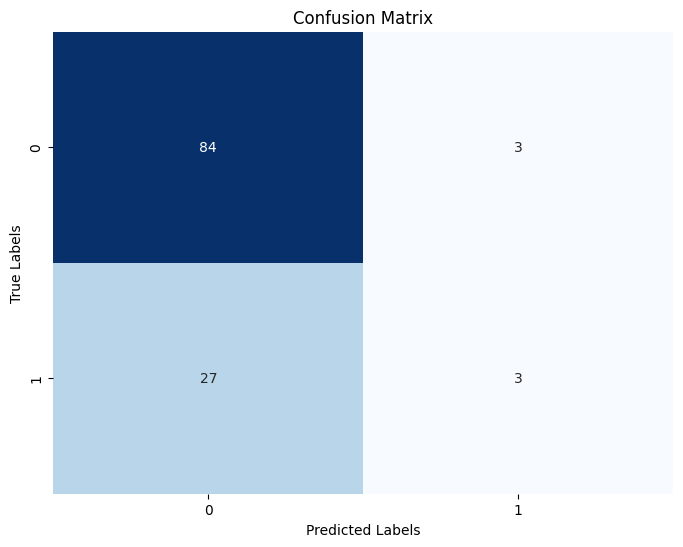

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the predictions from CatBoost and Logistic Regression stored in catboost_pred and lr_pred respectively

# Combine predictions from both classifiers
ensemble_pred = (catboost_pred + lr_pred) // 2  # Simple averaging of predictions

# Compute the confusion matrix
cm = confusion_matrix(y_test, ensemble_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


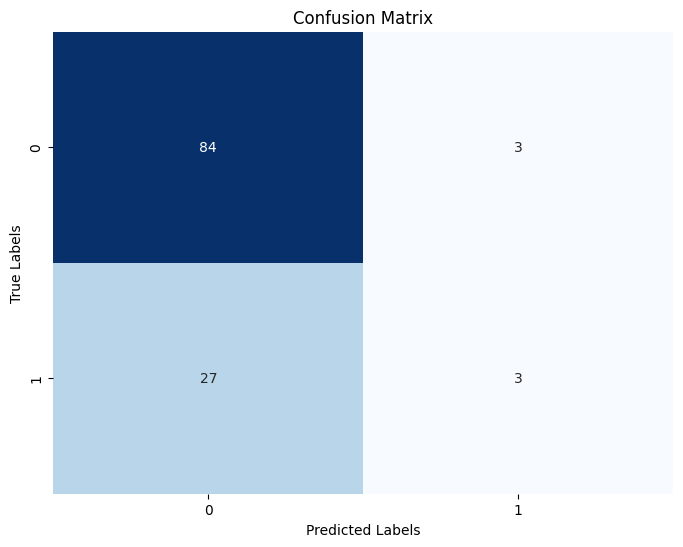

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import LabelEncoder

# Encode the 'Gender' column
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])


# Drop rows with missing values
data.dropna(inplace=True)

# Encode categorical variables if any
# For example:
# data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})

# Split the data into features and target
X = data.drop('Dataset', axis=1)
y = data['Dataset']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train CatBoost classifier
catboost = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, random_state=42, verbose=False)
catboost.fit(X_train, y_train)
catboost_pred = catboost.predict(X_test)

# Train Logistic Regression classifier
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Combine predictions from both classifiers
ensemble_pred = (catboost_pred + lr_pred) // 2  # Simple averaging of predictions

# Compute the confusion matrix
cm = confusion_matrix(y_test, ensemble_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


error analysis plot

<ipython-input-111-0da83f69cd6a>:50: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


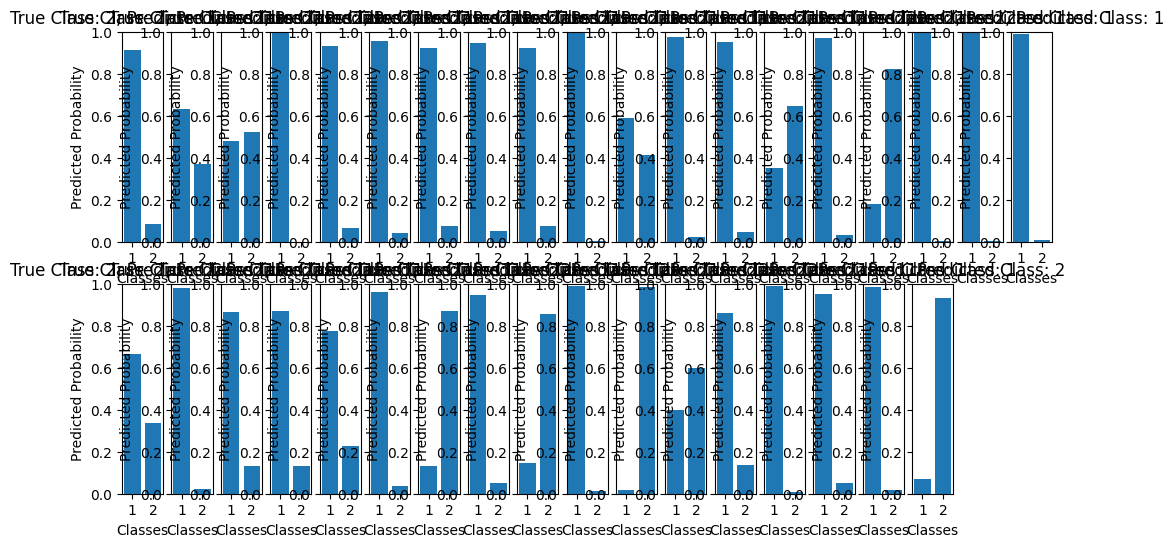

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

# Load the dataset


# Drop rows with missing values
data.dropna(inplace=True)

# Encode categorical variables if any
# For example:
# data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})

# Split the data into features and target
X = data.drop('Dataset', axis=1)
y = data['Dataset']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train CatBoost classifier
catboost = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, random_state=42, verbose=False)
catboost.fit(X_train, y_train)

# Make predictions
y_pred = catboost.predict(X_test)
y_pred_proba = catboost.predict_proba(X_test)

# Get incorrect predictions
incorrect_indices = np.where(y_pred != y_test)[0]

# Plot predicted probabilities for each class
plt.figure(figsize=(12, 6))
for i, idx in enumerate(incorrect_indices):
    plt.subplot(2, len(incorrect_indices)//2 + 1, i+1)
    plt.bar(catboost.classes_, y_pred_proba[idx])
    plt.title(f"True Class: {y_test.iloc[idx]}, Predicted Class: {y_pred[idx]}")
    plt.xlabel("Classes")
    plt.ylabel("Predicted Probability")
    plt.ylim(0, 1)
plt.tight_layout()
plt.show()

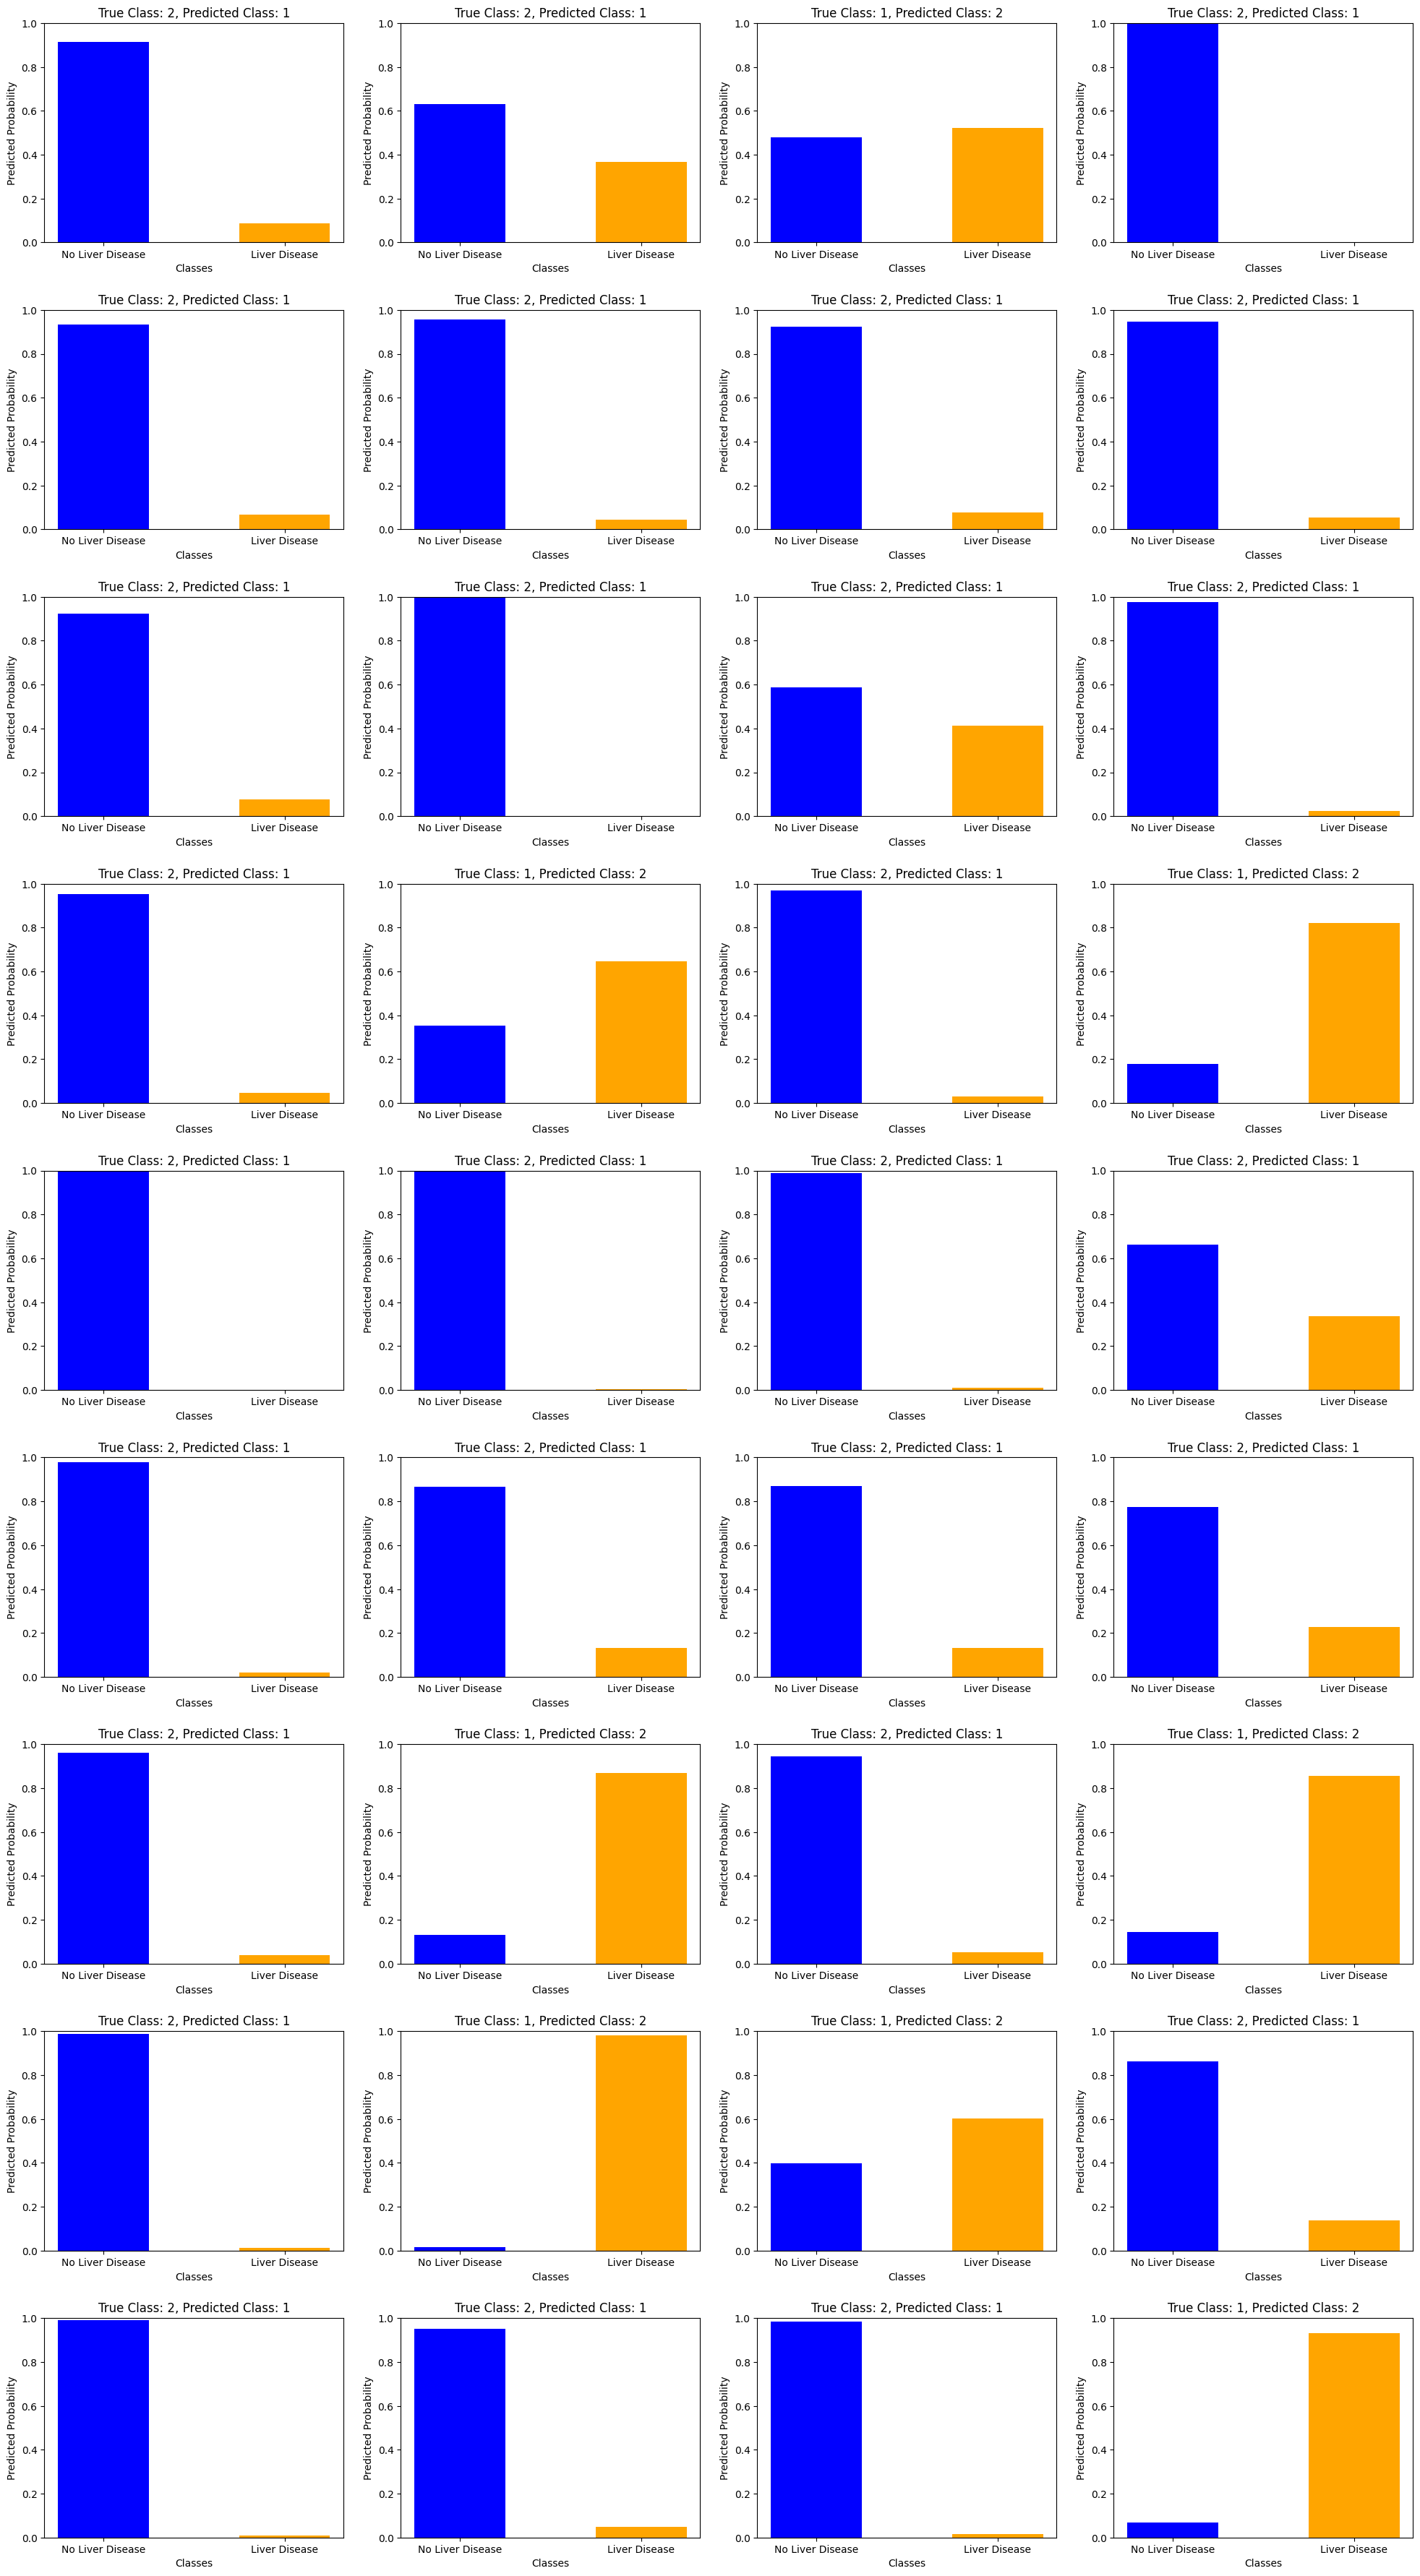

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



# Drop rows with missing values
data.dropna(inplace=True)

# Encode categorical variables if any
# For example:
# data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})

# Split the data into features and target
X = data.drop('Dataset', axis=1)
y = data['Dataset']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train CatBoost classifier
catboost = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, random_state=42, verbose=False)
catboost.fit(X_train, y_train)

# Make predictions
y_pred = catboost.predict(X_test)
y_pred_proba = catboost.predict_proba(X_test)

# Get incorrect predictions
incorrect_indices = np.where(y_pred != y_test)[0]

# Plot predicted probabilities for each class
num_incorrect = len(incorrect_indices)
num_cols = min(num_incorrect, 4)  # Maximum of 4 columns for subplot
num_rows = (num_incorrect + num_cols - 1) // num_cols

plt.figure(figsize=(num_cols * 5, num_rows * 4))
for i, idx in enumerate(incorrect_indices):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.bar(catboost.classes_, y_pred_proba[idx], width=0.5, color=['blue', 'orange'])
    plt.title(f"True Class: {y_test.iloc[idx]}, Predicted Class: {y_pred[idx]}")
    plt.xlabel("Classes")
    plt.ylabel("Predicted Probability")
    plt.ylim(0, 1)
    plt.xticks(catboost.classes_, ['No Liver Disease', 'Liver Disease'])
plt.tight_layout(pad=2)
plt.show()

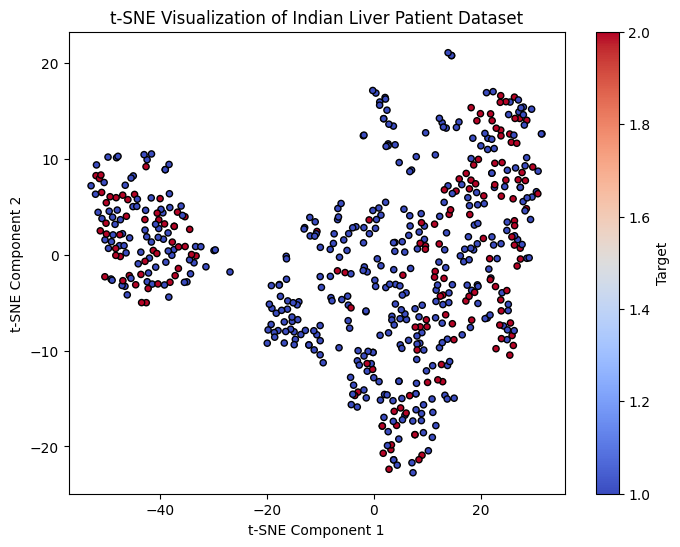

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder

# Encode the 'Gender' column
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

# Drop rows with missing values
data.dropna(inplace=True)

# Encode categorical variables if any
# For example:
# data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})

# Split the data into features and target
X = data.drop('Dataset', axis=1)
y = data['Dataset']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Plot the reduced-dimensional data
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.title('t-SNE Visualization of Indian Liver Patient Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Target')
plt.show()


In [ ]:
jalist=[ensemble_accuracy,ensemble_accuracy1]
accuracyReport = pd.DataFrame(jalist, index=['Multi-Layer Perceptron and Support Vector Machine','Logistic Regression and CatBoost'])
accuracyReport.columns = ['Accuracy']
accuracyReport.insert(loc=1, column='F1-score',value=f1_list)
accuracyReport.insert(loc=2, column='LogLoss',value=log_list)
accuracyReport.columns.name = 'Algorithm'
accuracyReport


NameError: name 'ensemble_accuracy' is not defined

In [ ]:
!pip install scikit-learn
!pip install --upgrade scikit-learn

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# Assuming you have the necessary imports and data preprocessing steps already performed

# Train MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)

# Predict labels on test data
mlp_pred = mlp_model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, mlp_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for MLP Model')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y)))  # Number of classes
plt.xticks(tick_marks, np.unique(y))
plt.yticks(tick_marks, np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()


ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/usr/local/lib/python3.10/dist-packages/sklearn/metrics/__init__.py)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict labels on test data
mlp_pred = mlp_model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, mlp_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='blues', cbar=False)
plt.title('Confusion Matrix for MLP Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


KeyError: "'blues' is not a known colormap name"

<Figure size 800x600 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Encode the labels
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
svm_pred_encoded = le.transform(svm_pred)
# Assuming you have obtained predictions (svm_pred) and true labels (y_test)
num_classes = 2  # Replace with the actual number of classes in your data

# Generate confusion matrix
cm = confusion_matrix(y_test, svm_pred, num_classes=num_classes)

#cm = confusion_matrix(y_test, svm_pred, num_classes=len(np.unique(y_test)))
# Generate confusion matrix
#cm = confusion_matrix(y_test, svm_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar=False)
plt.title('Confusion Matrix for SVM Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



IndexError: index 2 is out of bounds for axis 0 with size 2